In [37]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [38]:
raw_data = pd.read_csv('EL_products.csv')
raw_data2 = pd.read_csv('EL_order.csv')
raw_data3 = pd.read_csv('EL_best-seller.csv')
raw_data.head()

,product_id,product_name,product_brand,year,product_price,product_quantity
0,1,Apple iPhone 6,iPhone,2018-11,87.95,102
1,2,Playstation 4,Game Console,2018-07,165.99,17
2,3,Macbook,Desktop,2018-12,12.99,140
3,4,Apple iPhone 7,iPhone,2020-08,80.99,178
4,5,Google Nexus Player,Set Top Box,2023-04,11.95,144


In [77]:
raw_data3.head()

,id,product_id,customer_id,quantity,order_id,year
0,1,331,726,510,426,2019
1,2,179,735,1380,468,2021
2,3,461,248,1318,639,2018
3,4,122,928,1453,143,2013
4,5,476,320,1091,631,2020


In [78]:
df = raw_data.merge(raw_data2, left_on='product_id', right_on='product_id')

In [79]:
df.head()

,product_id,product_name,product_brand,year,product_price,product_quantity,order_id,customer_id,order_date,quantity,TotalAmount,status,payment_method
0,1,Apple iPhone 6,iPhone,2018-11,87.95,102,1000,485,2019-05-11T11:55:50.528+07:00,81,26137.22,shipped,PayPal
1,2,Playstation 4,Game Console,2018-07,165.99,17,407,32,2013-08-13T13:55:22.040+07:00,389,27231.92,processing,PayPal
2,2,Playstation 4,Game Console,2018-07,165.99,17,941,905,2012-04-04T00:10:32.856+07:00,112,23471.85,delivered,cash on delivery
3,3,Macbook,Desktop,2018-12,12.99,140,932,238,2017-08-07T21:48:18.404+07:00,130,21955.69,delivered,PayPal
4,5,Google Nexus Player,Set Top Box,2023-04,11.95,144,142,348,2010-05-14T22:28:30.859+07:00,69,18220.96,delivered,cash on delivery


In [80]:
df.drop(['customer_id'],axis=1, inplace=True)

In [83]:
df['year'] = df['year'].astype(str).str[0:4]

In [84]:
df.describe(include='all')

,product_id,product_name,product_brand,year,product_price,product_quantity,order_id,order_date,quantity,TotalAmount,status,payment_method
count,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000,1000
unique,NaN,47,7,7,NaN,NaN,NaN,1000,NaN,NaN,4,3
top,NaN,Amazon 4K Fire TV,Android Mobile,2022,NaN,NaN,NaN,2019-05-11T11:55:50.528+07:00,NaN,NaN,shipped,cash on delivery
freq,NaN,38,222,182,NaN,NaN,NaN,1,NaN,NaN,267,344
mean,496.250000,NaN,NaN,NaN,107.143220,126.538000,500.500000,NaN,199.404000,30176.205720,NaN,NaN
std,288.136322,NaN,NaN,NaN,54.200463,74.993977,288.819436,NaN,111.721746,11718.644323,NaN,NaN
min,1.000000,NaN,NaN,NaN,10.000000,0.000000,1.000000,NaN,2.000000,10074.630000,NaN,NaN
25%,240.500000,NaN,NaN,NaN,60.950000,65.000000,250.750000,NaN,104.750000,19725.747500,NaN,NaN
50%,501.500000,NaN,NaN,NaN,105.990000,126.500000,500.500000,NaN,196.500000,30582.450000,NaN,NaN
75%,746.250000,NaN,NaN,NaN,153.000000,188.000000,750.250000,NaN,291.250000,40316.832500,NaN,NaN


In [85]:
df.isnull().sum()

product_id          0
product_name        0
product_brand       0
year                0
product_price       0
product_quantity    0
order_id            0
order_date          0
quantity            0
TotalAmount         0
status              0
payment_method      0
dtype: int64

In [86]:
data_no_mv = df.dropna(axis=0)
data_no_mv.describe(include='all')

,product_id,product_name,product_brand,year,product_price,product_quantity,order_id,order_date,quantity,TotalAmount,status,payment_method
count,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000,1000
unique,NaN,47,7,7,NaN,NaN,NaN,1000,NaN,NaN,4,3
top,NaN,Amazon 4K Fire TV,Android Mobile,2022,NaN,NaN,NaN,2019-05-11T11:55:50.528+07:00,NaN,NaN,shipped,cash on delivery
freq,NaN,38,222,182,NaN,NaN,NaN,1,NaN,NaN,267,344
mean,496.250000,NaN,NaN,NaN,107.143220,126.538000,500.500000,NaN,199.404000,30176.205720,NaN,NaN
std,288.136322,NaN,NaN,NaN,54.200463,74.993977,288.819436,NaN,111.721746,11718.644323,NaN,NaN
min,1.000000,NaN,NaN,NaN,10.000000,0.000000,1.000000,NaN,2.000000,10074.630000,NaN,NaN
25%,240.500000,NaN,NaN,NaN,60.950000,65.000000,250.750000,NaN,104.750000,19725.747500,NaN,NaN
50%,501.500000,NaN,NaN,NaN,105.990000,126.500000,500.500000,NaN,196.500000,30582.450000,NaN,NaN
75%,746.250000,NaN,NaN,NaN,153.000000,188.000000,750.250000,NaN,291.250000,40316.832500,NaN,NaN


C:\Users\admin\AppData\Local\Temp\ipykernel_16828\3819276952.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['product_price'])
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='product_price', ylabel='Density'>

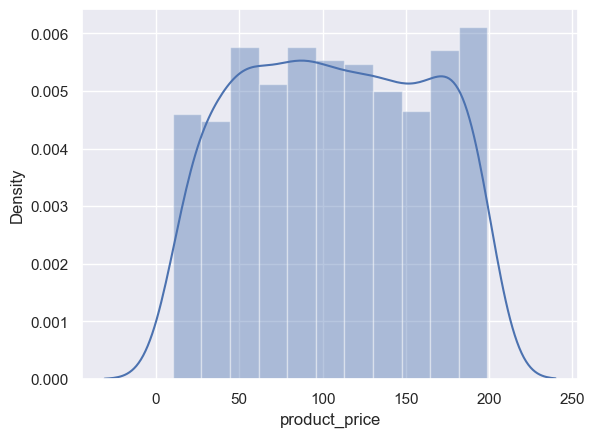

In [87]:
sns.distplot(data_no_mv['product_price'])

C:\Users\admin\AppData\Local\Temp\ipykernel_16828\400382879.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['year'])
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='Density'>

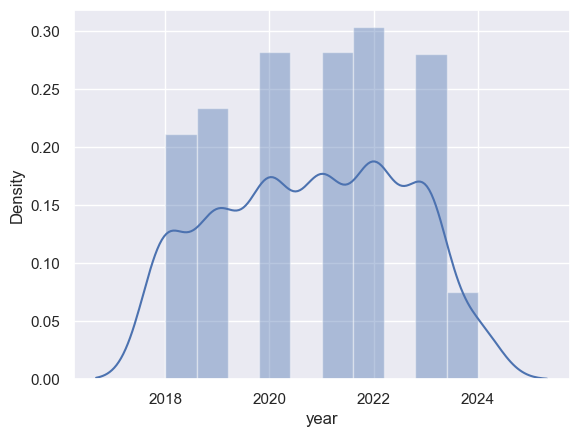

In [259]:
sns.distplot(data_no_mv['year'])

In [90]:
data_cleaned = data_no_mv.reset_index(drop=True)

In [91]:
data_cleaned.describe(include='all')

,product_id,product_name,product_brand,year,product_price,product_quantity,order_id,order_date,quantity,TotalAmount,status,payment_method
count,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000,1000
unique,NaN,47,7,7,NaN,NaN,NaN,1000,NaN,NaN,4,3
top,NaN,Amazon 4K Fire TV,Android Mobile,2022,NaN,NaN,NaN,2019-05-11T11:55:50.528+07:00,NaN,NaN,shipped,cash on delivery
freq,NaN,38,222,182,NaN,NaN,NaN,1,NaN,NaN,267,344
mean,496.250000,NaN,NaN,NaN,107.143220,126.538000,500.500000,NaN,199.404000,30176.205720,NaN,NaN
std,288.136322,NaN,NaN,NaN,54.200463,74.993977,288.819436,NaN,111.721746,11718.644323,NaN,NaN
min,1.000000,NaN,NaN,NaN,10.000000,0.000000,1.000000,NaN,2.000000,10074.630000,NaN,NaN
25%,240.500000,NaN,NaN,NaN,60.950000,65.000000,250.750000,NaN,104.750000,19725.747500,NaN,NaN
50%,501.500000,NaN,NaN,NaN,105.990000,126.500000,500.500000,NaN,196.500000,30582.450000,NaN,NaN
75%,746.250000,NaN,NaN,NaN,153.000000,188.000000,750.250000,NaN,291.250000,40316.832500,NaN,NaN


Text(0.5, 1.0, 'Price and Year')

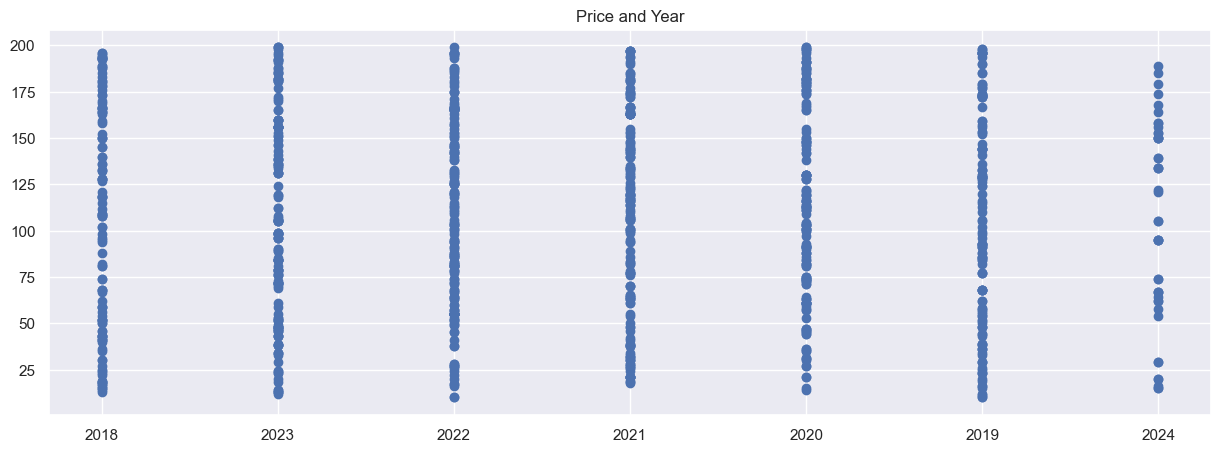

In [113]:
f, (ax1) = plt.subplots(1, sharey=True, figsize =(15,5))
ax1.scatter(data_cleaned['year'], data_cleaned['product_price'])
ax1.set_title('Price and Year')

Text(0.5, 1.0, 'Price and Year')

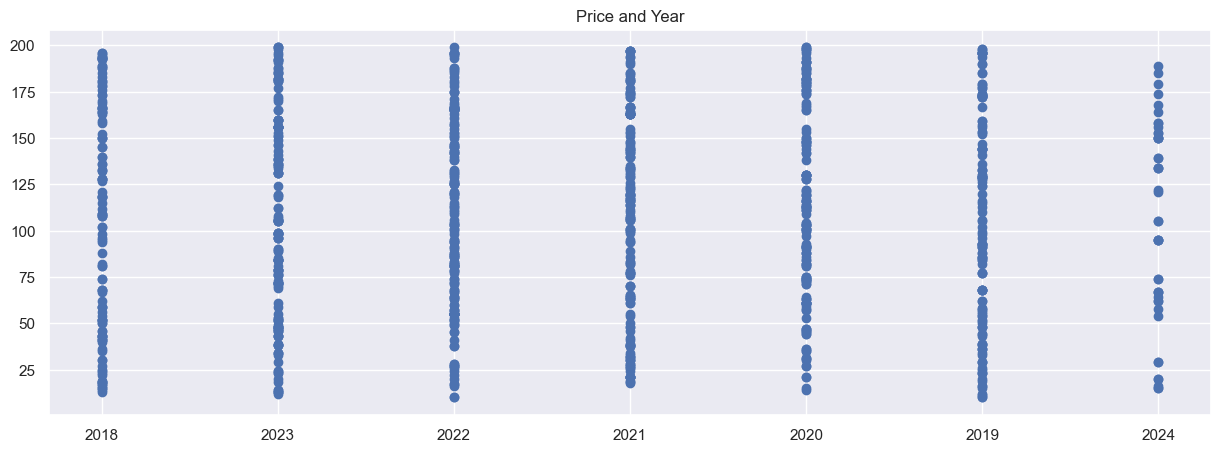

In [114]:
f, (ax1) = plt.subplots(1, sharey=True, figsize =(15,5))
ax1.scatter(data_cleaned['year'], data_cleaned['product_price'])
ax1.set_title('Price and Year')

In [92]:
### checking the OLS assumptions

In [93]:
log_price = np.log(data_cleaned['product_price'])
data_cleaned['log_price'] = log_price
data_cleaned

,product_id,product_name,product_brand,year,product_price,product_quantity,order_id,order_date,quantity,TotalAmount,status,payment_method,log_price
0,1,Apple iPhone 6,iPhone,2018,87.95,102,1000,2019-05-11T11:55:50.528+07:00,81,26137.22,shipped,PayPal,4.476768
1,2,Playstation 4,Game Console,2018,165.99,17,407,2013-08-13T13:55:22.040+07:00,389,27231.92,processing,PayPal,5.111928
2,2,Playstation 4,Game Console,2018,165.99,17,941,2012-04-04T00:10:32.856+07:00,112,23471.85,delivered,cash on delivery,5.111928
3,3,Macbook,Desktop,2018,12.99,140,932,2017-08-07T21:48:18.404+07:00,130,21955.69,delivered,PayPal,2.564180
4,5,Google Nexus Player,Set Top Box,2023,11.95,144,142,2010-05-14T22:28:30.859+07:00,69,18220.96,delivered,cash on delivery,2.480731
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,993,Amazon 4K Fire TV,Set Top Box,2021,167.00,245,776,2016-03-26T14:06:19.689+07:00,293,42826.60,processing,PayPal,5.117994
996,994,Roku Ultra,Set Top Box,2023,77.00,117,538,2010-08-19T19:41:11.679+07:00,308,20222.08,delivered,credit card,4.343805
997,995,Nintendo 3DS,Game Console,2020,44.00,250,756,2013-07-12T21:03:58.504+07:00,216,45731.62,shipped,cash on delivery,3.784190
998,995,Nintendo 3DS,Game Console,2020,44.00,250,953,2013-01-07T03:47:20.362+07:00,79,35379.80,processing,credit card,3.784190


Text(0.5, 1.0, 'Price and Year')

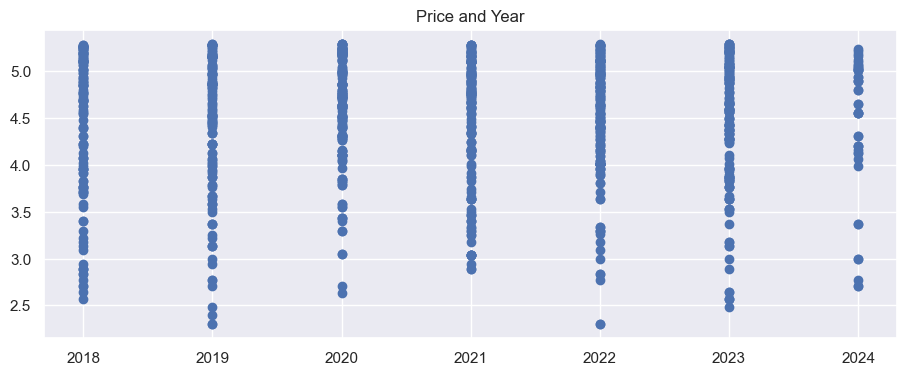

In [191]:
f, (ax1) = plt.subplots(1, sharey=True, figsize =(11,4))
ax1.scatter(data_cleaned['year'], data_cleaned['log_price'])
ax1.set_title('Price and Year')

In [192]:
data_cleaned.columns.values

array(['product_id', 'product_name', 'product_brand', 'year',
       'product_price', 'product_quantity', 'order_id', 'order_date',
       'quantity', 'TotalAmount', 'status', 'payment_method', 'log_price'],
      dtype=object)

In [202]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['year','product_quantity']]
variables

,year,product_quantity
0,2018,102
1,2018,17
2,2018,17
3,2018,140
4,2023,144
...,...,...
995,2021,245
996,2023,117
997,2020,250
998,2020,250


In [203]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [204]:
vif

,VIF,features
0,3.849633,year
1,3.849633,product_quantity


In [205]:
data_with_dummies = pd.get_dummies(data_cleaned, drop_first=True)

In [206]:
data_with_dummies.head()

,product_id,year,product_price,product_quantity,order_id,quantity,TotalAmount,log_price,product_name_Amazon Kindle 3,product_name_Amazon Kindle 4,...,order_date_2024-01-09T03:40:33.842+07:00,order_date_2024-01-11T03:51:19.856+07:00,order_date_2024-01-23T04:49:09.373+07:00,order_date_2024-01-23T16:43:33.668+07:00,order_date_2024-01-29T09:02:41.564+07:00,status_pending,status_processing,status_shipped,payment_method_cash on delivery,payment_method_credit card
0,1,2018,87.95,102,1000,81,26137.22,4.476768,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2,2018,165.99,17,407,389,27231.92,5.111928,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2,2018,165.99,17,941,112,23471.85,5.111928,False,False,...,False,False,False,False,False,False,False,False,True,False
3,3,2018,12.99,140,932,130,21955.69,2.564180,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,2023,11.95,144,142,69,18220.96,2.480731,False,False,...,False,False,False,False,False,False,False,False,True,False


In [216]:
data_with_dummies.columns.values

array(['product_id', 'year', 'product_price', ..., 'status_shipped',
       'payment_method_cash on delivery', 'payment_method_credit card'],
      dtype=object)

In [217]:
cols = ['log_price','product_id', 'year', 'product_price', 'status_shipped',
       'payment_method_cash on delivery', 'payment_method_credit card']

In [218]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,product_id,year,product_price,status_shipped,payment_method_cash on delivery,payment_method_credit card
0,4.476768,1,2018,87.95,True,False,False
1,5.111928,2,2018,165.99,False,False,False
2,5.111928,2,2018,165.99,False,True,False
3,2.564180,3,2018,12.99,False,False,False
4,2.480731,5,2023,11.95,False,True,False


In [219]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis = 1)

In [220]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [221]:
inputs_scaled = scaler.transform(inputs)

In [224]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [225]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [226]:
y_hat = reg.predict(x_train)

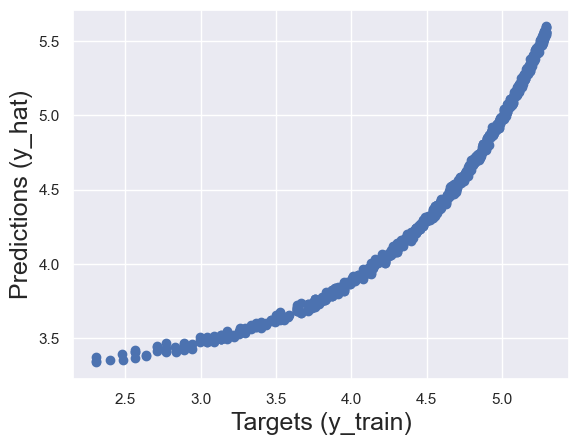

In [230]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size = 18)
plt.ylabel('Predictions (y_hat)', size = 18)
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_16828\522410697.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Residuals PDF ')

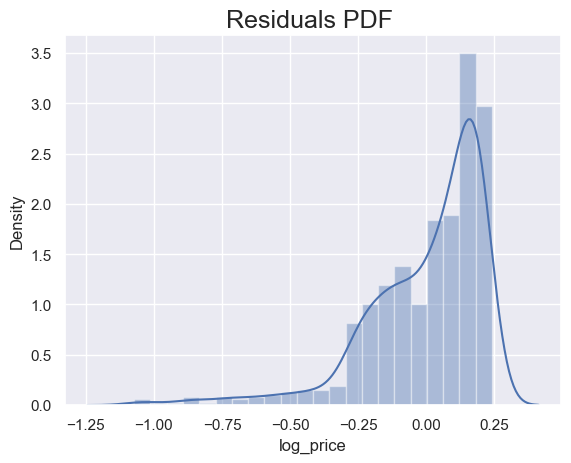

In [231]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF ", size = 18)

In [232]:
reg.score(x_train, y_train)

0.8929850864209822

In [233]:
reg.intercept_

4.499853329338447

In [235]:
reg.coef_

array([ 0.00219799,  0.01778702,  0.63741762,  0.00401394, -0.00364342,
       -0.00560676])

In [240]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=["Features"])
reg_summary["Weights"] = reg.coef_
reg_summary

,Features,Weights
0,product_id,0.002198
1,year,0.017787
2,product_price,0.637418
3,status_shipped,0.004014
4,payment_method_cash on delivery,-0.003643
5,payment_method_credit card,-0.005607


In [242]:
data_cleaned['payment_method'].unique()

array(['PayPal', 'cash on delivery', 'credit card'], dtype=object)

In [244]:
y_hat_test = reg.predict(x_test)

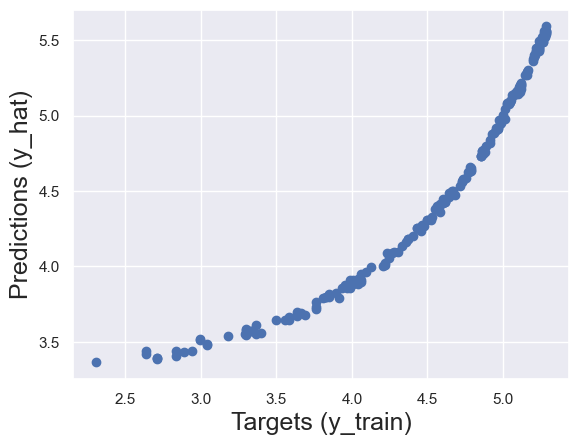

In [245]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_train)', size = 18)
plt.ylabel('Predictions (y_hat)', size = 18)
plt.show()

In [247]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,54.238463
1,34.385316
2,258.110698
3,34.738458
4,80.558050


In [248]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,54.238463,NaN
1,34.385316,NaN
2,258.110698,NaN
3,34.738458,NaN
4,80.558050,NaN
...,...,...
195,249.192523,129.99
196,82.091161,84.00
197,259.220751,NaN
198,259.769422,NaN


In [250]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    4.126973
1    3.177637
2    5.283153
3    3.295837
4    4.564348
Name: log_price, dtype: float64

In [251]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,54.238463,61.99
1,34.385316,23.99
2,258.110698,196.99
3,34.738458,27.00
4,80.558050,96.00
...,...,...
195,249.192523,192.00
196,82.091161,97.99
197,259.220751,196.99
198,259.769422,194.99


In [252]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [254]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,54.238463,61.99,7.751537,12.504496
1,34.385316,23.99,-10.395316,43.331871
2,258.110698,196.99,-61.120698,31.027310
3,34.738458,27.00,-7.738458,28.660955
4,80.558050,96.00,15.441950,16.085364
...,...,...,...,...
195,249.192523,192.00,-57.192523,29.787773
196,82.091161,97.99,15.898839,16.224960
197,259.220751,196.99,-62.230751,31.590817
198,259.769422,194.99,-64.779422,33.221920


In [255]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,200.000000,200.000000,200.000000,200.000000
mean,112.434928,107.188500,-5.246428,19.832502
std,72.383624,57.943482,22.604096,22.986686
min,28.863086,10.000000,-69.992873,0.040155
25%,48.612308,54.712500,-13.804952,8.349099
50%,88.068185,104.990000,1.423407,14.911154
75%,170.647205,160.240000,13.496850,20.838568
max,267.982873,198.000000,20.285272,188.630865


In [258]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
12,43.02,43.00,-0.02,0.04
32,149.36,148.95,-0.41,0.28
175,144.38,144.95,0.57,0.39
57,39.61,39.95,0.34,0.86
92,44.19,45.00,0.81,1.79
45,144.90,147.99,3.09,2.09
59,154.52,150.95,-3.57,2.36
16,41.81,42.99,1.18,2.76
68,44.66,45.99,1.33,2.89
122,40.18,38.95,-1.23,3.15
